https://github.com/hccho2/DL-UPMTP

# 제1장 

### 1.1.1 Broadcasting  

shape이 다른 배열 사이에 연산이 될 수 있도록 array의 shape을 확장시키는 것

In [4]:
import numpy as np
A = np.random.randn(4,3)
B = np.random.randn(3)
result = A*B
print(result.shape)

A_hat = np.random.randn(4,1)
result2 = A_hat*B
print(result2.shape)

(4, 3)
(4, 3)


### 1.1.3 Basic Indexing & Advanced Indexing  

Basic : Numpy array에서 slicing으로 영역을 추출하는 방식  
Advanced : 불연속적인 영역을 추출할 수 있게 해주는 좀 더 유연한 방식

In [5]:
X = np.random.randn(5,4)

X[1:4,1:3] # Basic Indexing
X[X>0.5] # Advanced Indexing

array([1.44758924, 1.28779606, 1.45162971, 1.51953057])

In [13]:
x = np.array([[-5,2,0,7],
              [-1,9,3,8],
              [-3,-3,4,6]])

a=x[::2,1] # view x값도 변한다
b=x[[0,2],[1,1]] # copy x와 무관

a[0]=-99
b[1]=-99

print(x)

[[ -5 -99   0   7]
 [ -1   9   3   8]
 [ -3  -3   4   6]]


In [15]:
X.argmax(axis=-1) # 행(axis=-1) 뱡향으로 최댓값을 가지는 인덱스 추출

X[np.arange(len(X)),X.argmax(axis=-1)] # 행 방향으로 최댓값 추출

array([ 1.44758924, -0.45347844,  0.47589489,  1.45162971,  1.51953057])

### 1.1.4 numpy.add.at  

neural network의 back-propagation 연산에서 중요하게 활용

In [16]:
# 1차원 예시
a=np.array([0,0,0,0,0,0])
idx = [0,1,1,3]
b=np.array([1,2,10,20])
np.add.at(a,idx,b) # 수식 : a[idx(k)] += b(k) , k=0,1,2,3
print(a)

[ 1 12  0 20  0  0]


In [18]:
# 2차원 예시
a=np.zeros([2,4],int)
np.add.at(a,([1,0],[1,3]),[5,10])
print(a)

[[ 0  0  0 10]
 [ 0  5  0  0]]


### 1.1.7 행렬곱을 벡터들의 가중합으로 보기

In [20]:
# N개 데이터를 배치로 처리
batch_size = 2; n=5; m=3
W = np.random.randn(batch_size,n)
H = np.random.randn(batch_size,n,m)
print('W : ',W,'\n','H : ',H)

A= np.matmul(W[:,None,:],H) # (batch_size,1,n)*(batch_size,n,m) --> (batch_size,1,m)
print('A1 : ',A)
A = A.squeeze(1) # (batch_size,1,m) --> (batch_size,m)
print('A2 : ',A)

W :  [[ 0.1152294   0.49865927 -0.92068041 -1.61682825  0.15195281]
 [ 0.06900114 -0.17376298 -0.41373324  0.35268814 -2.04404204]] 
 H :  [[[-0.28069757  0.1968865  -0.62859051]
  [ 0.04157447 -0.02758024  0.31779428]
  [-0.13383906 -1.14156615 -2.18094907]
  [-1.89761588  0.36123542  0.43653655]
  [-0.32835263 -1.18352858 -1.05146306]]

 [[-1.36083487  0.2271098  -1.46682092]
  [ 0.80694094  0.15172852 -0.65712482]
  [ 0.2158772  -0.63528573 -0.04441591]
  [-2.35288859  0.18415883  0.06942324]
  [ 0.5746291   0.54123783  1.30720888]]]
A1 :  [[[ 3.12983474  0.29605544  1.22841865]]

 [[-2.32783315 -0.78921739 -2.61615716]]]
A2 :  [[ 3.12983474  0.29605544  1.22841865]
 [-2.32783315 -0.78921739 -2.61615716]]


## 1.2 Tensorflow 기초
### 1.2.1 tf.constant, tf.convert_to_tensor, tf.Variable

In [ ]:
%pip install Tensorflow

In [5]:
import tensorflow as tf
import numpy as np

In [7]:
a=np.array([[0.84,-0.15,-1.33],
          [0.11,-0.36,0.08]])

X= tf.convert_to_tensor(a)
Y= tf.constant(a,shape=(6,))

V= tf.Variable(a) # Variable은 Gradient가 계산되는 훈련 가능한 Tensor
V.assign_add(X)

Z=tf.convert_to_tensor(V)

print(f'X : {X}')
print(f'Y : {Y}')
print(f'V : {V}')
print(f'Z : {Z}')

X : [[ 0.84 -0.15 -1.33]
 [ 0.11 -0.36  0.08]]
Y : [ 0.84 -0.15 -1.33  0.11 -0.36  0.08]
V : <tf.Variable 'Variable:0' shape=(2, 3) dtype=float64, numpy=
array([[ 1.68, -0.3 , -2.66],
       [ 0.22, -0.72,  0.16]])>
Z : [[ 1.68 -0.3  -2.66]
 [ 0.22 -0.72  0.16]]


### 1.2.2 tf.gather, tf.gather_nd  

Tensorflow에서는 Advanced Indexing이 직접적으로 허용되지 않는다.
tf.gather(),tf.gather_nd() API를 이용해서 처리 가능

In [9]:
X = np.array([[0.5267, 0.0362, 0.171,  0.2661],
                [0.0076,  0.0247, 0.8906, 0.0771],
                [0.265,   0.2017, 0.4556, 0.0777],
                [0.0972,  0.4766, 0.3375, 0.0887],
                [0.11,    0.2512, 0.2637, 0.3751]])
print('X: \n', X)
idx = np.array([0,2,2,1,3])
print('idx: ', idx)

print('='*20)
A = X[np.arange(len(X)),idx ]
print("Numpy: ", A)

assert len(idx) ==len(X) # assert : 거짓이면 오류 출력
B  = tf.gather(X,idx,axis=1,batch_dims=1) # [(0,0), (1,2), (2,2), (3,1), (4,3)] 원소를 추출한다.
print("TF(batch_dims=1): ", B)

idx2 = [0,2,2,1,3,1,2]
C  = tf.gather(X,idx2,axis=1,batch_dims=0) # 열 추출
print("TF(batch_dims=0): ", C)

X: 
 [[0.5267 0.0362 0.171  0.2661]
 [0.0076 0.0247 0.8906 0.0771]
 [0.265  0.2017 0.4556 0.0777]
 [0.0972 0.4766 0.3375 0.0887]
 [0.11   0.2512 0.2637 0.3751]]
idx:  [0 2 2 1 3]
Numpy:  [0.5267 0.8906 0.4556 0.4766 0.3751]
TF(batch_dims=1):  tf.Tensor([0.5267 0.8906 0.4556 0.4766 0.3751], shape=(5,), dtype=float64)
TF(batch_dims=0):  tf.Tensor(
[[0.5267 0.171  0.171  0.0362 0.2661 0.0362 0.171 ]
 [0.0076 0.8906 0.8906 0.0247 0.0771 0.0247 0.8906]
 [0.265  0.4556 0.4556 0.2017 0.0777 0.2017 0.4556]
 [0.0972 0.3375 0.3375 0.4766 0.0887 0.4766 0.3375]
 [0.11   0.2637 0.2637 0.2512 0.3751 0.2512 0.2637]], shape=(5, 7), dtype=float64)


In [11]:
idx_ = list(zip(np.arange(len(idx)),idx)) # zip은 동일한 개수로 이루어진 데이터들을 묶어서 리턴 (튜블로 변환)
print('idx: ', idx_)
print(tf.gather_nd(X,idx_)) # tf.gather_nd()는 indices를 구체적으로 명시하는 방식

idx:  [(0, 0), (1, 2), (2, 2), (3, 1), (4, 3)]
tf.Tensor([0.5267 0.8906 0.4556 0.4766 0.3751], shape=(5,), dtype=float64)


### 1.2.3 tf.math  

각종 수학적인 연산과 기본적인 함수에대한 API 제공

In [ ]:
Z=tf.math.add(X,Y) # 2개 Tensor를 합하는 API

### 1.2.4 Class vs Function API  

Tensorflow에서는 같은 기능을 함수와 Class 형태로 제공

| Type | 작명규칙(Naming Convention) | 예 |
|-------|-------|-------|
| Function | 소문자로만 사용, (_)로 구분 | func, my_func |
| Class | 대문자로 시작, (_) 사용 금지 | MyClass, Model |
| Constant | 대문자만 사용, (_)로 구분 | MY_COSTANT,<br>LEARNING_RATE |


## 1.3 Pytorch 기초  

Pytorch에서는 Numpy Array를 직접적으로 받아즐이지는 못하고 Pytorch Tensor로 변환해서 모델에 넣을 수 있다.  
List나 Numpy Array를 Pytorch Tensor로 변환하는 기본 API는 torch.tensor()이다.

In [ ]:
%pip install torch

In [15]:
import torch
import numpy as np
torch.__version__  # 1.13.1+cu116

'2.4.1'

In [16]:
# dtype을 결정하지 않으면, 타입은 data에 따라 적절히 정해진다
print(torch.tensor([1,2]).dtype)
print(torch.tensor([1.,2.]).dtype)
print(torch.tensor(np.array([1.,2.])).dtype)
print(torch.tensor(np.array([1.,2.]),dtype=torch.float).dtype)


torch.int64
torch.float32
torch.float64
torch.float32


In [17]:
a= np.array([1,2,3,9])
b= torch.tensor(a,dtype=torch.float32) # copy
c= torch.from_numpy(a) # 메모리 공유
a[0]=-1 # c도 같이 변경된다
print(b,c)

tensor([1., 2., 3., 9.]) tensor([-1,  2,  3,  9])


Pytorch Tensor는 device를 구분한다.  
Numpy Array로부터 생성될 때에는 CPU-Tensor로 생성.  
CPU-Tensor는 **to()** 로 device를 변경할 수 있다.  

ex : `y=x.to('cuda')`

In [ ]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ...
model.to(device)

## 1.4 Pandas



# 제 2장 회귀분석  

## 2.1 머신러닝과 회귀분석

### 2.1.1 선형회귀 분석

y=ax+b
여기서 a,b는 찾아야 할 파라메터
W = (a,b)이고 fw(x) = ax+b
a,b를 통칭하여 가중치(weight) 또는 파라메터(parameter)라고 한다 *이때 b를 편향(bias)이라 부르기도 함  

*오차,Error 또는 Cost* : y(데이터)와 추정치(y^)의 차이 (계산할 때 절댓값을 구하기도 하고 차이를 제곱하기도 함)  
*MSE(Mean Squared Error)* : 모든 data의 제곱 오차를 평균한 전체 오차

## 2.2 회귀분석 모델의 행렬 표현  

shape이 다른 행렬을 더하는 연산을 broadcasting이라 부른다

### 2.2.1 손실 함수(Loss Function)  

*L2 norm* :목푯값 Y와 모델 예측값 Y^의 각 원소 차의 제곱합에 제곱근을 취한 값  
MSE=1/N(L2 norm 제곱)  

MSE외에도 여러 가지 Loss 함수를 도입 가능  
손실 함수를 비용(Cost) 함수라 부르기도 한다  

*L1 norm* : 목푯값과 예측값의 차이의 절댓값의 합으로 정의

### 2.2.3 n차원 입력 데이터, m차원 출력 데이터  

입력되는 데이터를 feature(피쳐,특성)라고 부르기도 한다.  
그래서 feature의 차원이 n이라고 할 수 있다.  

입력 데이터의 차원이 n이고 출력의 차원이 m인 경우 `Y^ = XM + B`의 크기는 (N x M)이 된다 * 이때 bias B는 broadcasting이 되어 (1 x m) -> (N x m)으로 변형

### 2.2.4 Normal Equation(정규 방정식)  

$\theta = (X^T X)^{-1} X^T y$

In [1]:
import numpy as np

np.random.seed(100)
N = 50
a = 2.0; b = 0.5

X = np.random.rand(N) # shape(N,)
Y = a*X + b + np.random.randn(N)*0.05
X = np.stack([X,np.ones(N)],axis=1) # bias를 위해 1로 된 column 추가, shape(N,2)
a_pred, b_pred = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y)) # normal equation
print(f'true values: {a}, {b}  --> 예측값: {a_pred:.3f}, {b_pred:.3f}')

true values: 2.0, 0.5  --> 예측값: 2.013, 0.482


## 미분과 역전파  

### 2.3.1 경사하강법(Gradient Descent)  

1. Batch Gradient Descent(BGD): 전체 데이터를 사용하여 Loss에 대한 weight들의 Gradient를 계산한 후, 경사하강법을 적용하는 방식. 
2. Mini-Batch Gradient Descent: 전체 데이터를 일정 크기(batch size)로 나눈 데이터를 미니배치(Mini Batch)라고 한다. 이 미니 배치에 댄한 Gradient로 경사하강법 적용. 
3. Stochastic Gradient Descent(SGD): 데이터 1개에 대한 Gradient로 경사하강법을 적용

### 2.3.2 연쇄 법칙(Chain Rule)  

1. **forward propagation(순전파)**: 입력 데이터를 모델에 넣어 예측값을 생성하는 과정  

    $\mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b}$

    $\mathbf{a} = f(\mathbf{z})$

    입력값 x에서 L이 구해지는 과정  
    forward 계산 과정에서의 중간 값들을 저장하여 backward propagation에서 사용  
<br>
<br>
2. **backward propagation(역전파)**: loss 값을 미분해서 각 변수별로 gradient를 계산하는 과정  

    $\delta^{(l)} = (\mathbf{W}^{(l+1)})^T \delta^{(l+1)} \odot f'(\mathbf{z}^{(l)})$
    가중치 업데이트는 다음과 같습니다.

    $\mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} - \eta \cdot \delta^{(l)} \cdot \mathbf{a}^{(l-1)T}$  
    gradient를 계산하기 위해서는 foward의 역순으로 계산이 이루어지기 때문에 backward라 부른다  
    backward propagation에서는 미분이 필요하고, 이 미분 계산의 핵심은 연쇄 법칙이다.  
<br>
<br>
다변수의 (편)미분을 벡터 형태로 모아 놓은 것을 gradient라 한다.

### 2.3.8 Gradient 표기 

변수 Z:(kxl)가 있고 Loss함수 L이 있다고 하면 L(Z)는 실숫 값이 된다  
$\nabla L = \frac{dL}{dZ}$  
줄여서 *dZ*로 표기

## 2.4 선형회귀 모델 구현  

### 2.4.1 Numpy로 구현  

기본 연산만으로 구현하는 것을 밑바닥부터 구현이라 부른다

In [1]:
import numpy as np
np.random.seed(100)
learning_rate = 0.01; N=50
x= np.random.rand(N) # random으로 데이터 생성
Y=2*x +0.5 +np.random.rand(N)*0.15
X=np.stack([x,np.ones(N)],axis=1) # 1로 구성된 column추가

W = np.random.randn(2) # random normal로 초기값 설정하여 weight 생성
Loss_all = []
M=2000
for i in range(M):
    Y_hat = X.dot(W) # 행렬곱
    Loss = np.square(Y_hat-Y).sum()/N # 손실함수 계산
    Loss_all.append(Loss)
    dY = 2*(Y_hat-Y)/N
    dW = X.T.dot(dY)
    W= W -learning_rate*dW # W 업데이트
    if i%200==0:
        print(f'{i}/{M}: loss = {Loss}')

0/2000: loss = 0.4091347068168067
200/2000: loss = 0.06272225549527034
400/2000: loss = 0.03416653676094246
600/2000: loss = 0.01894824087043477
800/2000: loss = 0.01083412857209777
1000/2000: loss = 0.00650783465125544
1200/2000: loss = 0.004201135113289112
1400/2000: loss = 0.0029712457771022887
1600/2000: loss = 0.0023154916338471747
1800/2000: loss = 0.001965855708285385


In [ ]:
%pip install matplotlib

In [ ]:
%pip install koreanize-matplotlib

import koreanize_matplotlib

Text(0.5, 0.98, 'Numpy로 계산한 결과')

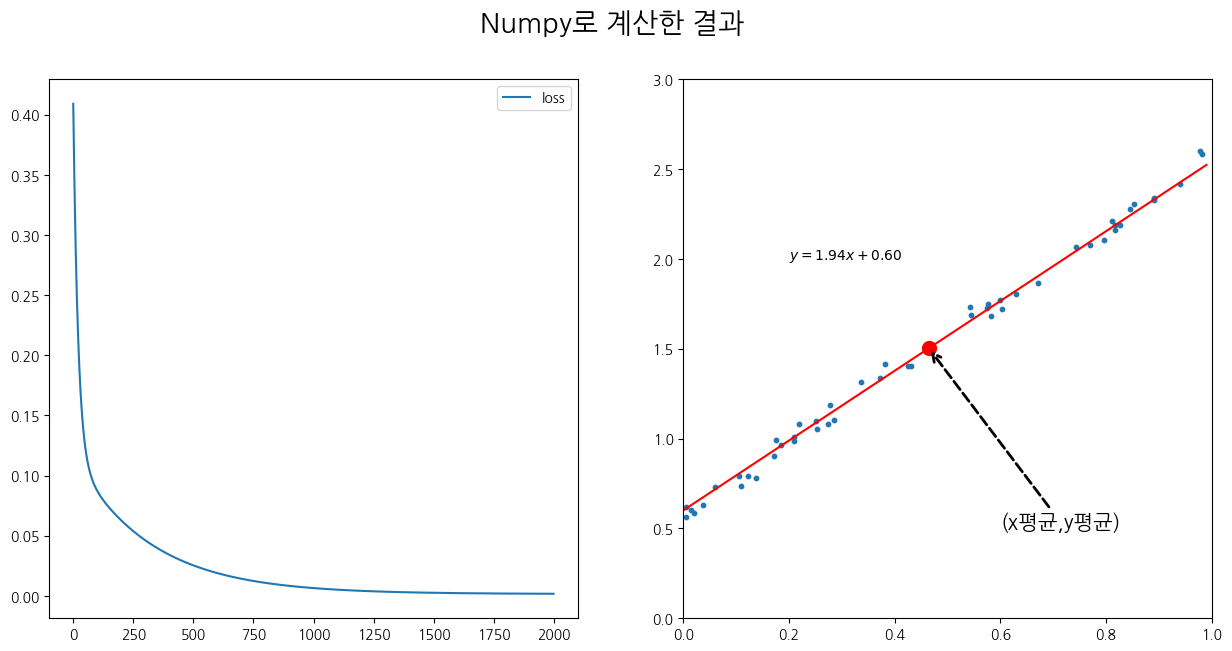

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(Loss_all,label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,Y,s=10)
x_temp=np.arange(0,1,0.01)
a,b=W
yy=a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3); plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x+{b:.2f}$")

plt.plot([x.mean()],[Y.mean()],'ro',markersize=10)
plt.annotate("(x평균,y평균)",xy=(x.mean(),Y.mean()),xytext=(0.6,0.5),
    arrowprops=dict(arrowstyle="->",linestyle="--",linewidth=2,color='k'),fontsize=15)
plt.suptitle('Numpy로 계산한 결과',fontsize=20)

### 2.4.2 Numpy 모델로부터 추론  

모델의 훈련이 끝난 후 새로운 데이터를 넣어 예측값을 추출하는 과정을 추론(inference)이라 한다

In [11]:
new_data=np.array([0.52,0.75])
a,b = W
prediction=a*new_data + b
for x_,y_ in zip(new_data,prediction):
    print(f'{x_}에 대한 예측값 = {y_:4f}')

0.52에 대한 예측값 = 1.610604
0.75에 대한 예측값 = 2.057212


### 2.4.3 Tensorflow로 구현  

**FC layer** : 단순히 입력데이터 X에 weight 행렬 W를 곱하는 모델을 neural network에서는 Fully Connectde Layer라고 부른다.  

FC layer의 Tensorflow API : `tf.keras.layer.Dense(units,use_bias=True)`  
- units는 출려의 크기(차원)  
- tf.keras.Model에서는 처음으로 들어오는 구체적인 입력값의 크기에 따라 weight tensor의 크기가 결정된다.  
- `model.build()`를 해주면 구체적인 입력값을 넣지 않고 모델의  weight shape이 결정되게 할 수 있다.  
<br>

Tensorflow의 경사 하강법(Gradient Descent) API : `tk.keras.optimizers.SGD(learning_rate=0.01)`  
<br>

compile이라는 API로 model,optimizer,loss 함수 결합 : `tf.keras.Model.compile(optimizer,loss)`  
- Loss 함수를 MSE로 설정하는 방법은 loss=tf.keras.losses.MeanSquaredError() 또는 loss='mse'  
<br>

`model.fit()`을 통해 train(훈련)이 이루어진다 : `tf.keras.Model.fit(x=None, y=None, batch_size=None, epochs=1, verbose)`  
- verbose : 로그 메시지를 출려하는 정도를 조절하는 옵션  
- 100회 반복이 1-epoch

In [13]:
import numpy as np
import tensorflow as tf

np.random.seed(100); tf.keras.utils.set_random_seed(100)
learning_rate=0.01
n_epochs = 2000
N=50

x=np.random.rand(N)
Y=2*x +0.5 +np.random.rand(N)*0.15
X=x.reshape(-1,1) # (N,) -> (N,1)

model = tf.keras.Sequential([tf.keras.layers.Dense(1,use_bias=True)])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer,loss='mse')

history=model.fit(X,Y,batch_size=N,epochs=n_epochs,verbose=0)

In [15]:
print(model)
print(f'기울기:{model.weights[0][0,0].numpy():.2f}')
print(f'bias: {model.weights[1][0].numpy():.2f}')

<Sequential name=sequential_1, built=True>
기울기:1.95
bias: 0.60


### 2.4.4 Tensorflow 모델로부터 추론  

`model.predict(x,batch_size,verbose='auto', ...)`

In [18]:
new_data= np.array([0.52,0.75])

prediction=model.predict(new_data).reshape(-1) # (N,1)->(N,)
for x,y in zip(new_data,prediction):
    print(f'{x}에 대한 예측값 = {y:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.52에 대한 예측값 = 1.6108
0.75에 대한 예측값 = 2.0597


### 2.4.5 Pytorch로 구현  

Pytorch에서는 Numpy Array를 Pytorch Tensor로 직접 변환 해야함  

FC layer : `torch.nn.linear(in_features, out_features, bias=True)`  
- in_features,out_features는 각각 입력의 크기, 출력의 크기
<br>

MSE Loss 함수 API : `torch.nn.MSELoss()`  
<br>

경사하강법 API : `torch.optim.SGD(params, lr)`
- params : 최적화 API를 optimizer라 부르는데, optimizer에는 학습 대상이 되는 trainable weight(parameter)를 넘겨 주어야 한다. 이는 `model.parameters()`를 통해 넘겨 주어야 함  
- lr : lr에는 학습률(learning_rate)을 지정하면 된다

<br>
<br>

훈련  
- optimizer.zero_grad() : optimizer가 넘겨 받은 parameter들의 gradient값을 0으로 초기화 한다.  
- loss.backward : Pytorch Tensor의 계산 과정에 관여한 Tensor들의 gradient를 계산한다. 여기서 Tensor는 loss이다.
- optimizer.step() : optimizer의 대상이 되는 파라미터 Tensor들을(W) 업데이트한다.

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def torch_reset_seed(seed=100):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True # 속도 저하
        torch.backends.cudnn.benchmark = False # 속도 저하



np.random.seed(100); np.random.seed(100)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

torch_reset_seed(100)

learning_rate = 0.01
n_epochs = 2000
N = 50

x = np.random.rand(N)  # np.float64
y = 2*x + 0.5 + np.random.randn(N)*0.15

X = torch.Tensor(x).reshape(-1,1).to(device)  # torch.tensor(x,dtype=torch.float32).reshape(-1,1).to(device)
Y = torch.Tensor(y).to(device)

model = torch.nn.Linear(1,1)
model.to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Loss_all = []
# train mode 변환
model.train()  # 딥러닝 모델의 layer는 train 할 때와 test(evluation, inference)할 때 다르게 동작하는 것들이 있어 mode를 지정하는 코드를 작성해주는 것이 좋다.

for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model(X)
    Loss = loss_fn(Y_hat.reshape(-1),Y)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%200==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

cpu
0/2000: loss = 2.0522611141204834
200/2000: loss = 0.3047095835208893
400/2000: loss = 0.1726619154214859
600/2000: loss = 0.10229284316301346
800/2000: loss = 0.06477334350347519
1000/2000: loss = 0.04476871341466904
1200/2000: loss = 0.03410260006785393
1400/2000: loss = 0.028415609151124954
1600/2000: loss = 0.025383437052369118
1800/2000: loss = 0.02376674860715866


Text(0.5, 0.98, 'Pytorch로 계산한 결과')

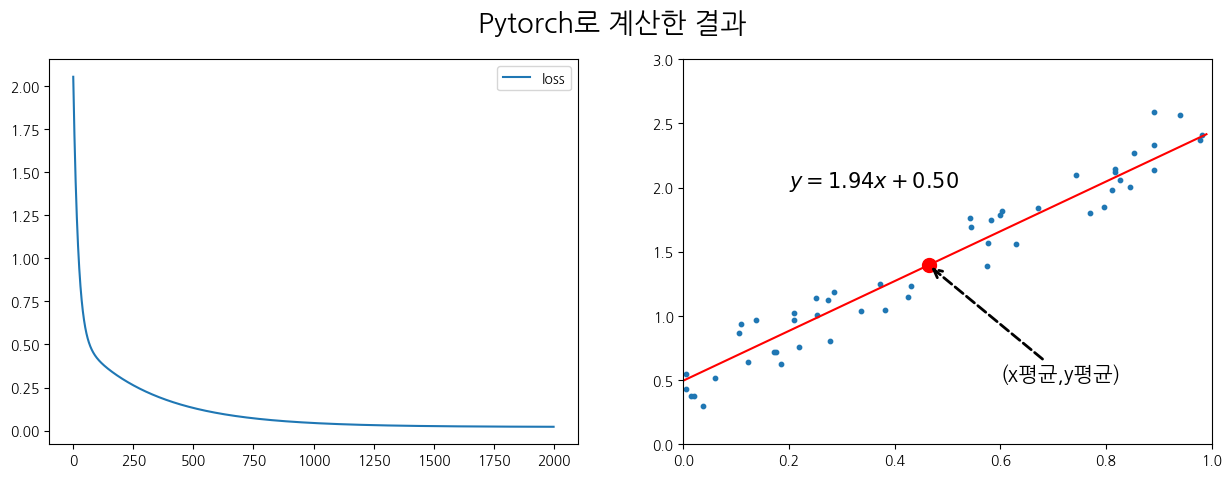

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Loss_all,label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,y,s=10)
x_temp = np.arange(0,1,0.01)
a,b = model.weight.item(), model.bias.item()
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3)
plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x + {b:.2f}$",fontsize=15)

plt.plot([x.mean()],[y.mean()],'ro',markersize=10)

plt.annotate("(x평균,y평균)", xy=(x.mean(), y.mean()), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=2,color='k'),fontsize=15)
plt.suptitle('Pytorch로 계산한 결과',fontsize=20)
     

### 2.4.6 Pytorch 모델로부터 추론  

1. 입력 데이터를 Pytorch Tensor로 변환해야 하고, 데이터의 shape도 모델의 입력 shape과 동일하게 변환해 주어야 한다.
2. `eval()`mode로 전환 후, 데이터를 모델에 넣어주면 된다.
3. Pytorch에서는 Tensor들의 연산이 이루어질 때, 자동으로 gradient를 계산한다.  
추론에서는 gradient를 계산할 필요가 없기 때문에, `torch.no_grad()`를 with context 구문으로 처리하면 된다.  
`with torch.no_grad():`  
동일한 효과  
`with torch.set_grad_enabled(False):` * 훈련 모드에서는 True, 추론 모드에서는 False로 조절  
4. 출력 결과를 Numpy array로 변환하기 위해서는 CPU Tensor로 먼저 변환해야한다.  
Tensor의 `requires_grad`속성이 True인 경우에는 `detach()`를 먼저 해주어야 한다.

In [22]:
new_data = torch.tensor([0.52, 0.75]).reshape(-1,1).to(device)
with torch.no_grad():
    model.eval()
    prediction  = model(new_data).cpu().numpy().reshape(-1)
for x,y in zip(new_data.cpu().numpy().reshape(-1), prediction):
    print(f'{x:.2f}에 대한 예측값 = {y:.4f}')

0.52에 대한 예측값 = 1.5043
0.75에 대한 예측값 = 1.9504


### 2.4.7 Scikit-Learn 구현  

선형회귀 분석 API : `LinearRegression`

In [ ]:
%pip install scikit-learn

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


np.random.seed(100)
N = 50
x = np.random.rand(N)
Y = 2*x + 0.5 + np.random.randn(N)*0.15
X = x.reshape(-1,1) # (N,) -> (N,1)

reg = LinearRegression().fit(X, Y)
print(f'결정 계수: {reg.score(X, Y)}') # coefficient of determination(결정 계수)

print(f'기울기: {reg.coef_}, bias: {reg.intercept_}')

new_data = np.array([0.52, 0.75]).reshape(-1,1)
print(f'예측: {reg.predict(new_data)}')
     

결정 계수: 0.9484605364424324
기울기: [2.0395017], bias: 0.4453361968069177
예측: [1.50587708 1.97496248]


### 2,4,9 Tensorflow, Pytorch로 Gradient 계산하기  

tensorflow, pytorch, numpy 계산 결과가 모두 동일하다.

In [1]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

# Pytorch로 계산
X0 = np.random.randn(2,3)
W0 = np.random.randn(3,2)
dY0 = np.random.randn(2,2)
# Pytorch tensor로 변환
X = torch.tensor(X0,requires_grad=True)
W = torch.tensor(W0,requires_grad=True)
dY = torch.tensor(dY0)  # upstream gradient


Y = torch.mm(X,W)
Y.backward(dY)

print(f'Pytorch 결과: \n{X.grad} \n {W.grad}')

Pytorch 결과: 
tensor([[-0.1381, -0.7412, -0.7256],
        [ 0.3245,  2.9489,  2.7682]], dtype=torch.float64) 
 tensor([[-0.2680, -0.4084],
        [ 0.3884,  0.8700],
        [ 0.2618,  0.7164]], dtype=torch.float64)


In [3]:
# torch.mm()은 행렬 곱셈
print(torch.mm(dY,W.T))   # X.grad와 일치
print(torch.mm(X.T,dY))  # W.grad와 일치

tensor([[-0.1381, -0.7412, -0.7256],
        [ 0.3245,  2.9489,  2.7682]], dtype=torch.float64,
       grad_fn=<MmBackward0>)
tensor([[-0.2680, -0.4084],
        [ 0.3884,  0.8700],
        [ 0.2618,  0.7164]], dtype=torch.float64, grad_fn=<MmBackward0>)


In [5]:
# Tensorflow로 계산
# Tensorflow Tensor로 변환
X = tf.convert_to_tensor(X0)
W = tf.convert_to_tensor(W0)
dY = tf.convert_to_tensor(dY0)

with tf.GradientTape() as tape:
    tape.watch([X,W]) # 상수를 미분할 수 있게 바꿔줌
    Y = tf.matmul(X,W)

dX,dW = tape.gradient(Y, [X,W],output_gradients=dY)   # output_gradients = upstream gradient
print(dX,dW) # Pytorch 결과와 동일

tf.Tensor(
[[-0.13810097 -0.74124774 -0.72559481]
 [ 0.32451858  2.94886403  2.76817565]], shape=(2, 3), dtype=float64) tf.Tensor(
[[-0.26800424 -0.40836022]
 [ 0.38843299  0.87004454]
 [ 0.26178812  0.71643685]], shape=(3, 2), dtype=float64)


- 직접 생성하는 tensor는 default 값이 `requires_grad=False`이다 그래서 명시적으로 `requires_grad=True`로 설정해 주어야함  
- `nn.Linear`같은 API 내부에서 생성되는 tensor(weight,bias)는 자동으로 `requires_grad=True`로 설정  
- Tensorflow에서 gradient를 계산하기 위해서는 `tf.GradientTape()`를 사용한다.  
X,W가 상수이기 때문에 `watch()`를 통해 gradient를 계산해야 하는 tensor로 지정해야 한다.  
gradient는 `tape.gardient()`에서 계산한다.
- X,W를 만들 때, `tf.Variable(X)`,`tf.Variable(W)`로 생성했다면 변수가 되기 때문에 `watch()`로 지정하지 않아도 된다.
- `tape.gradient(loss,x)` 후진 모드 자동 미분 (Reverse mode automatic differentiation) 방법으로 손실에 대한 x의 미분을 계산

In [6]:
XX = tf.Variable(X0)
WW = tf.Variable(W0)

with tf.GradientTape() as tape:
    YY = tf.matmul(XX,WW)

dXX,dWW = tape.gradient(YY, [XX,WW],output_gradients=dY)   # output_gradients = upstream gradient
print(dXX,dWW)


tf.Tensor(
[[-0.13810097 -0.74124774 -0.72559481]
 [ 0.32451858  2.94886403  2.76817565]], shape=(2, 3), dtype=float64) tf.Tensor(
[[-0.26800424 -0.40836022]
 [ 0.38843299  0.87004454]
 [ 0.26178812  0.71643685]], shape=(3, 2), dtype=float64)


- `tape.gradient`를 한 번 호출하고 나면, 자동 계산을 위해 저장해 놓은 값들이 지워진다.  
`tape.gradient`를 두 번 이상 호출하기 위해서는 `persitent=True` 옵션을 지정하고 사용이 끝난 tape는 지워주어야 한다.

In [7]:
with tf.GradientTape(persistent=True) as tape:
    YY = tf.matmul(XX,WW)

dXX= tape.gradient(YY, XX,output_gradients=dY)
dWW= tape.gradient(YY, WW,output_gradients=dY)
del tape
print(dXX,dWW)

tf.Tensor(
[[-0.13810097 -0.74124774 -0.72559481]
 [ 0.32451858  2.94886403  2.76817565]], shape=(2, 3), dtype=float64) tf.Tensor(
[[-0.26800424 -0.40836022]
 [ 0.38843299  0.87004454]
 [ 0.26178812  0.71643685]], shape=(3, 2), dtype=float64)
